# 2.1 - Evaluación Supervisado

### Regresión

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.model_selection import train_test_split as tts

In [8]:
data=load_diabetes()

In [11]:
X_train, X_test, y_train, y_test = tts(data.data, data.target)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [12]:
rf=RFR()

rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

In [13]:
y_pred[:10]

array([172.54, 162.17,  76.87, 132.89,  73.27, 125.53, 180.77, 214.53,
       124.22, 116.08])

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [14]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

3432.4082225225225

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [16]:
mse(y_test, y_pred, squared=False)

58.58675808169046

###### RMSLE


$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_i)-log(\hat{y}_i))^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [18]:
from sklearn.metrics import mean_squared_log_error as msle

msle(y_test, y_pred, squared=False)

0.42780917027657805

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [19]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

47.320810810810826

###### R2


$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

###### Adjusted R2

$$AdjustedR2 = 1-(1-R^{2})\frac{n-1}{n-p-1}$$


donde:
+ n = tamaño de la muestra
+ p = nº de variables del modelo


pertenecen al intervalo (-$\infty$, 1]

In [20]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.37616888272712423

In [22]:
rf.score(X_test, y_test)

0.37616888272712423

### Clasificación

In [24]:
from sklearn.datasets import load_wine

from sklearn.svm import SVC

data=load_wine()

X_train, X_test, y_train, y_test = tts(data.data, data.target)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [25]:
svc=SVC().fit(X_train, y_train)

y_pred=svc.predict(X_test)

In [26]:
y_pred[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1])

+ TP := True Positive (aciertos clase 1)
+ TN := True Negative (aciertos clase 0)
+ FP := False Positive (Error tipo I, decir 1 cuando es 0)
+ FN := False Negative (Error tipo II, decir 0 cuando es 1)

+ Accuracy  := (TP+TN)/(TP+TN+FP+FN) (acierto)  ($\frac{1}{n}\sum 1(\hat{y_i}=y_i$))
+ Precision := TP/(TP+FP)
+ Recall    := TP/(TP+FN)  (Sensibilidad, TPR)
+ F1_Score  := 2·Recall·Precision/(Recall+Precision)

(F1 funciona mejor que el accuracy cuando los datos no están balanceados y cuando FP y FN son muy diferentes)

![f1](images/f1.png)

##### Accuracy

In [28]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

0.6222222222222222

In [29]:
svc.score(X_test, y_test)

0.6222222222222222

##### Precision

In [31]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='macro')

0.6410256410256411

##### Recall

In [32]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.6222222222222222

##### F1_Score

In [33]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.5729439878766683

##### Matriz de Confusión

![conf_matrix](images/conf_matrix.jpeg)

In [34]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[12,  1,  2],
       [ 1, 14,  0],
       [ 0, 13,  2]])

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

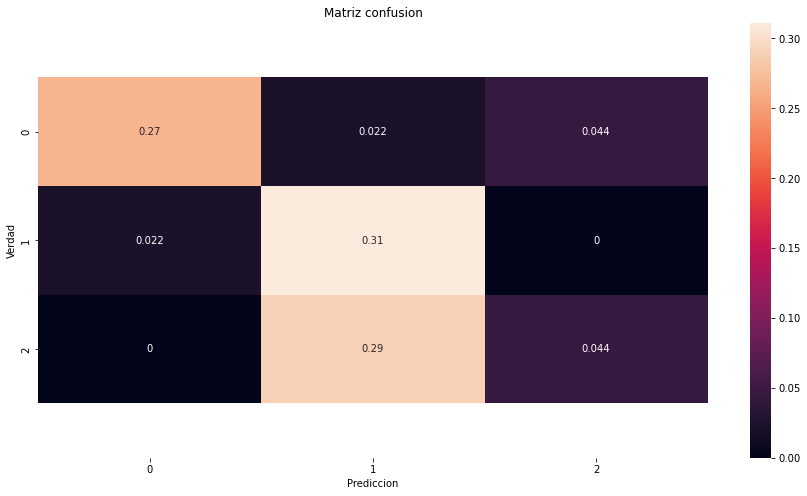

In [40]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![roc](images/roc.png)

In [45]:
from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()

X_train, X_test, y_train, y_test = tts(data.data, data.target)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [52]:
svc=SVC(probability=True).fit(X_train, y_train)


y_pred=svc.predict(X_test)  # predice etiqueta


y_prob=svc.predict_proba(X_test)[::, 1]  # devuelve probabilidad


In [53]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc 

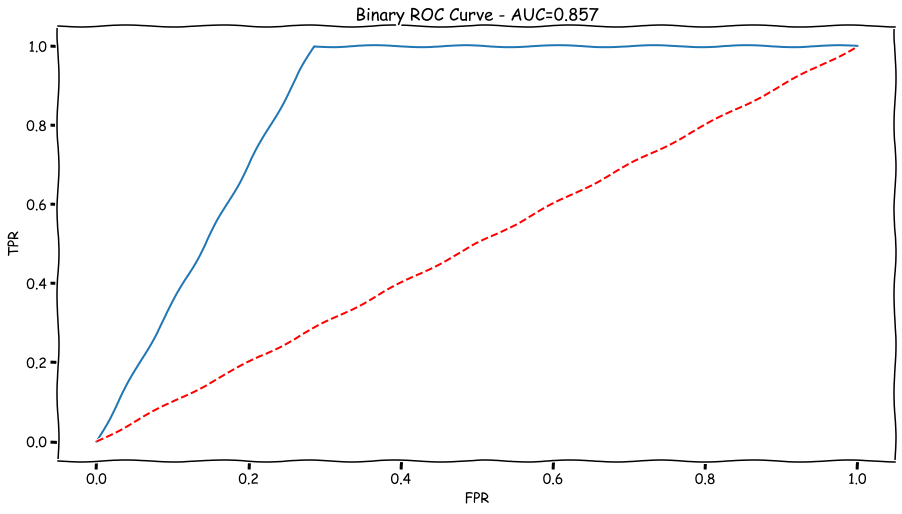

In [55]:
with plt.xkcd():    # mal pintao, y_pred
    
    plt.figure(figsize=(15, 8))
    
    fpr, tpr, umbrales = roc(y_test, y_pred)
    a=auc(y_test, y_pred)
    
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve - AUC={:.3f}'.format(a))
    plt.show();

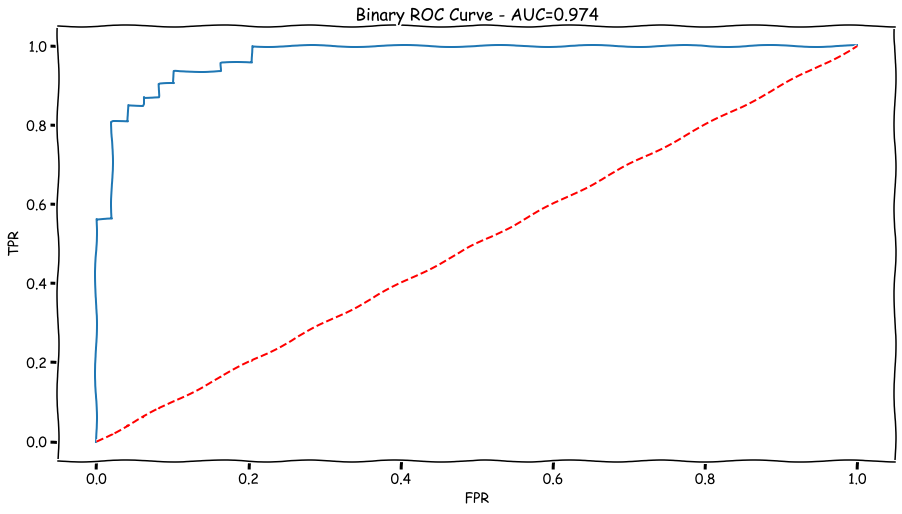

In [56]:
with plt.xkcd():    # bien pintao, y_prob
    
    plt.figure(figsize=(15, 8))
    
    fpr, tpr, umbrales = roc(y_test, y_prob)
    a=auc(y_test, y_prob)
    
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve - AUC={:.3f}'.format(a))
    plt.show();

In [57]:
umbrales

array([1.98502152e+00, 9.85021523e-01, 9.63702274e-01, 9.63614655e-01,
       8.90029761e-01, 8.85885796e-01, 8.63820830e-01, 8.57874884e-01,
       8.52543508e-01, 8.49743534e-01, 8.28205919e-01, 8.14611844e-01,
       7.86070953e-01, 7.02265936e-01, 6.96592206e-01, 6.54723248e-01,
       3.82865718e-01, 1.43648109e-04])

In [58]:
acc(y_test, y_pred)

0.9020979020979021

In [ ]:
!pip install scikit-plot

In [59]:
import scikitplot as skplt

In [60]:
data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test)

y_prob=svc.predict_proba(X_test)

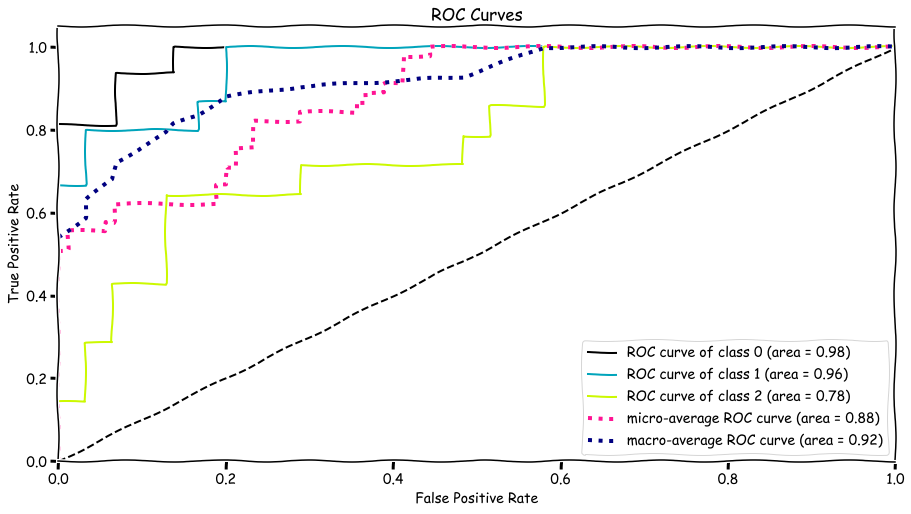

In [64]:
with plt.xkcd():

    skplt.metrics.plot_roc(y_test, y_prob, figsize=(15, 8));

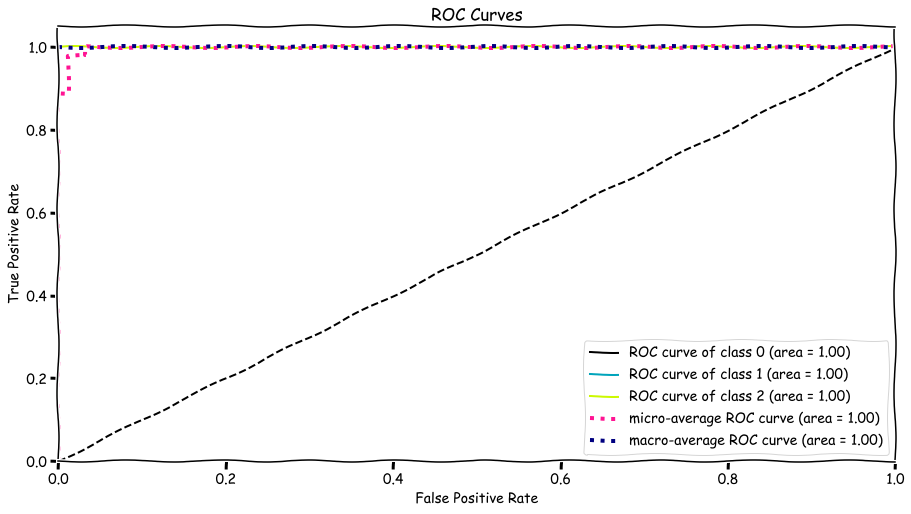

In [67]:
from sklearn.ensemble import RandomForestClassifier as RFC

data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

rf=RFC().fit(X_train, y_train)

y_pred=rf.predict(X_test)

y_prob=rf.predict_proba(X_test)


with plt.xkcd():

    skplt.metrics.plot_roc(y_test, y_prob, figsize=(15, 8));